# DS3000 Day 7

Oct 8, 2024

Admin
- Project Teams assigned Today (see [Google Sheet](https://docs.google.com/spreadsheets/d/1TcfBjDSYWNYwKJ4dlIW17eMjwbFg3XG3gmX95Aal5Pw/edit?usp=sharing))
  - Example project from previous semester posted to Canvas (**Note**: this semester has different guidelines, so the example project should **NOT** be used as a strict guide, but rather to give you some ideas).
  - TA Guides also assigned, **must meet with TA by Friday, Oct. 18** (if you do not receive an email from your TA by the end of this week, let me know)
  - Phase II due **Friday, Oct. 25** (Group submission to Gradescope, see ProjectGuidelines on Canvas)
- Homework 2 due **Tonight**
  - Take-Home Coding Exam will be posted then, due **Sunday, October 13**
  - Homework 3 will be posted then, due **Tuesday, October 29**

Push-Up Tracker
- Section 03: 3
- Section 05: 1

Content:
- Basic Data Summaries and Intro to Vectors
- Linear Algebra Basics
  - By Hand and In Python

In [1]:
# packages for today
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import plotly.express as px

## Where we left off: Covariance and Correlation

Covariance & Correlation are only defined between two values when the observations are somehow **linked**:
1. on the same **day**, we observe temp & beach population
1. on the same **individual**, we observe favortie number & hot dogs eaten
1. on the same **driver**, we observe speed and commute time

If we don't observe the data in pairs, correlation / covariance is not defined:
- `x=an individual's favorite number`
- `y=the temperature on a given day`

`x` is observed per individual while `y` is observed per day ... there isn't a way to "pair" every x with a y!

## Correlation (motivation)

Covariance by itself is not actually very useful, since the units are not (usually) interpretable. Instead, we usually use correlation.

Which has a more consistent relationship? (or maybe they're the same?)
- height of a person in `inches`
- height of a person in `cm`

or
- height of a person in `inches`
- height of a person in `feet`

In [5]:
inch_to_cm = 2.54
inch_to_feet = 1/12

df_height = pd.DataFrame({'height_inches': [68, 69, 70, 72, 55, 77]})
df_height['height_cm'] = df_height['height_inches'] * inch_to_cm
df_height['height_feet'] = df_height['height_inches'] * inch_to_feet

df_height

,height_inches,height_cm,height_feet
0,68,172.72,5.666667
1,69,175.26,5.750000
2,70,177.80,5.833333
3,72,182.88,6.000000
4,55,139.70,4.583333
5,77,195.58,6.416667


In [6]:
df_height.cov()

,height_inches,height_cm,height_feet
height_inches,53.900000,136.906000,4.491667
height_cm,136.906000,347.741240,11.408833
height_feet,4.491667,11.408833,0.374306


- Covariance between `height_inches` and `height_cm` ~= 136
- Covariance between `height_inches` and `height_feet` ~= 4

So is there a stronger relationship between `height_inches` and `height_cm`? ...

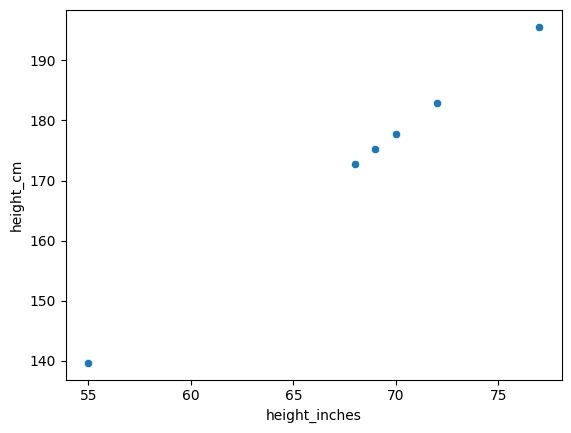

In [7]:
sns.scatterplot(data=df_height, x='height_inches', y='height_cm');

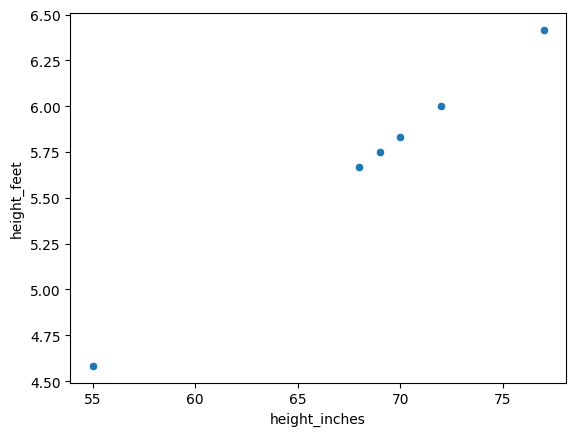

In [8]:
sns.scatterplot(data=df_height, x='height_inches', y='height_feet');

So is there a stronger relationship between `height_inches` and `height_cm`? ...

... not at all, they have the *same* relationship.  Its just that covariance depends on the units we measure in.  Smaller units -> bigger values -> bigger covariance.

## The 'strongest' relationship between two variables

In some sense, this is the 'strongest' possible relationship.  When one variable increases, the other always does so too.  

**Helpful fact:**
The covariance is always smaller than the product of the standard deviations of both variables:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

### Question: What does it mean that this is the 'strongest' possible relationship, and that the covariances are as large as they can possibly be?

In [9]:
# compute the correlation matrix (each item is correlation of that row & column)
df_height.corr()

,height_inches,height_cm,height_feet
height_inches,1.0,1.0,1.0
height_cm,1.0,1.0,1.0
height_feet,1.0,1.0,1.0


## Correlation (Compute)

Remember, the biggest (and smallest) covariance we can possibly have is the product of the standard deviations:

$$|cov(x,y)| \leq \sigma_x \sigma_y$$

Correlation: "How big of a covariance do you have comapred to how big it could possibly be?"

$$corr(x,y) = \frac{\texttt{cov}(x, y)}{\sigma_x \sigma_y} $$

In doing so, it removes any effect of the scale of the data might have (e.g. changing units).

## The most important correlation/covariance slide: why did we go through all this trouble?

- mean describes where a feature typically is
- variance / standard deviation describes how consistently a feature stays near its mean
- correlation describes which relationship two values have:
    - when x increases, y typically increases
    - when x increases, y typically stays the same
    - when x increases, y typically decreases
    - **MOST IMPORTANTLY**: Just because two features have a correlation, **does not** mean they have anything to do with each other: [Spurious Correlations](http://www.tylervigen.com/spurious-correlations)
![h](https://miro.medium.com/v2/resize:fit:600/0*PM2JXsJKrkZUS3DL.jpg)

## Reminder: representing data (samples & features)
To describe a collection of **samples** we record a set of **features** for each sample.

For example, when describing penguins:

In [10]:
df_penguin = sns.load_dataset('penguins')
df_penguin.dropna(axis=0, inplace=True)

df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


Each penguin is a sample for which we've observed 7 features:
- species
- island
- bill_length_mm
- bill_depth_mm
- flipper_length_mm
- body_mass_g
- sex 

A numerical dataset can be represented as an array (we'll return to those categorical variables `species`, `island` and `sex` later on). 

## Samples as vectors (or, "Uh-Oh, here comes some math!")

![h](https://preview.redd.it/x8lp90ubv2f71.png?width=680&format=png&auto=webp&s=b123c91c1dda38088b83f06fc3b6f302979e0e9c)

In [11]:
# only focus on numerical features (for now)
col_num_list = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df_penguin_num = df_penguin.loc[:, col_num_list]

# for pedagogical reasons, we need penguin1 to have slightly different values
df_penguin_num.iloc[1, :] = [40.2, 17.9, 194.0, 3700]

df_penguin_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,40.2,17.9,194.0,3700.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


Individual samples (penguins) are considered, mathematically, as vectors.  When sklearn looks at the first penguin it sees:

In [12]:
np.array(df_penguin_num.iloc[0, :])

array([  39.1,   18.7,  181. , 3750. ])

## Distances between samples
Many ML tools require that these vectors have meaningful distances between them.  
- A pair of samples with a large distance between them are considered different
- A pair of smaples with a small distance between them are considered similar

![g](https://imgs.capitalfm.com/images/21877?crop=16_9&width=660&relax=1&format=webp&signature=KomBh2hF95cddiEh7N8i4jakMvw=)

Computing (the $\ell_2$, or Euclidean) distance between two vectors $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$:

$$||x - x'||_2 = \sqrt{\sum_i (x_i - x_i')^2}$$

In words, to compute the distance between two vectors:
- we square the differences of each element
- add these values together
- compute the square root of this sum

How similar is penguin0 to penguin1?

In [13]:
penguin0 = df_penguin_num.iloc[0, :]
penguin0

bill_length_mm         39.1
bill_depth_mm          18.7
flipper_length_mm     181.0
body_mass_g          3750.0
Name: 0, dtype: float64

In [14]:
penguin1 = df_penguin_num.iloc[1, :]
penguin1

bill_length_mm         40.2
bill_depth_mm          17.9
flipper_length_mm     194.0
body_mass_g          3700.0
Name: 1, dtype: float64

In [15]:
sq_diff_per_feat = [(39.1 - 40.2) ** 2, (18.7 - 17.9) ** 2, (181 - 194) ** 2, (3750 - 3700) ** 2]
l2_dist = sum(sq_diff_per_feat) ** .5
l2_dist

51.68026702717392

In and of itself, this distance isn't too insightful ... the penguins are 50 ?unit? apart?  The value becomes more useful when compared to other distances.  Is penguin 1 more similar to penguin 0 or penguin 2?

![FDD](https://thatwhichiam.wordpress.com/wp-content/uploads/2020/11/d35.jpg)

In [16]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 51.680
distance between penguin1 and penguin2: 450.001


So: penguin0 and penguin1 are more similar since we observed:

    distance between penguin0 and penguin1: 51.680
    distance between penguin1 and penguin2: 450.001
    
Is this satisfying or should penguin1 and penguin2 be considered more similar?  Lets break it out by feature:

In [17]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[0, :]

bill_length_mm        1.1
bill_depth_mm        -0.8
flipper_length_mm    13.0
body_mass_g         -50.0
dtype: float64

In [18]:
df_penguin_num.iloc[1, :] - df_penguin_num.iloc[2, :]

bill_length_mm        -0.1
bill_depth_mm         -0.1
flipper_length_mm     -1.0
body_mass_g          450.0
dtype: float64

The bills and flippers of penguin2 and penguin1 are just about identical ... but their difference in body mass is so large that it yields a large distance.

## Big Idea 1: Distances assume that a change of 1 unit (in any feature) is equally significant

What if we measured the body mass of the penguin in a different unit?

In [19]:
# replace body_mass_g with body_mass_kg
df_penguin_num['body_mass_kg'] = df_penguin_num['body_mass_g'] / 1000
del df_penguin_num['body_mass_g']

df_penguin_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg
0,39.1,18.7,181.0,3.75
1,40.2,17.9,194.0,3.70
2,40.3,18.0,195.0,3.25


In [20]:
vec_penguin0 = np.array(df_penguin_num.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 13.071
distance between penguin1 and penguin2: 1.106


These numbers aren't just different, they claim an opposite conclusion: penguin1 and penguin2 are more similar!

- **Distances assume that a change of 1 unit (in any feature) is equally significant**
- **Distances implicitly weight how important each feature is relative to others according to its variance**
    - a feature with a higher variance is responsible for more of the distances
    
To wrap all the different features into a single distance we must say *something* about how important one feature is compared to another.  

In [21]:
df_penguin_num.std()

bill_length_mm        5.467070
bill_depth_mm         1.969606
flipper_length_mm    13.996877
body_mass_kg          0.805387
dtype: float64

### Scale Normalization:
How to scale your features so that they're equally important in our distance metric:

In [22]:
# by dividing each feature by the standard deviation, outputs will have same std dev
df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = df_penguin_num[feat] / df_penguin_num[feat].std()

In [23]:
df_penguin_num_scaled.std()

bill_length_mm_scaled       1.0
bill_depth_mm_scaled        1.0
flipper_length_mm_scaled    1.0
body_mass_kg_scaled         1.0
dtype: float64

In [24]:
df_penguin_num_scaled.head(3)

,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled,body_mass_kg_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Notice that in doing so, our units are no longer valid, so lets remove the units:

In [25]:
df_penguin_num_scaled.columns = ['bill_length_scaled',
                                'bill_depth_scaled',
                                'flippter_length_scaled',
                                'body_mass_scaled']
df_penguin_num_scaled.head(3)

,bill_length_scaled,bill_depth_scaled,flippter_length_scaled,body_mass_scaled
0,7.151911,9.494285,12.931456,4.656148
1,7.353115,9.088113,13.860235,4.594066
2,7.371407,9.138884,13.931679,4.035329


Now, which penguins are actually most similar?

In [26]:
vec_penguin0 = np.array(df_penguin_num_scaled.iloc[0, :])
vec_penguin1 = np.array(df_penguin_num_scaled.iloc[1, :])
vec_penguin2 = np.array(df_penguin_num_scaled.iloc[2, :])

# a quicker, equivilent way to compute distance
l2_dist_quick_a = np.linalg.norm(vec_penguin0 - vec_penguin1)
l2_dist_quick_b = np.linalg.norm(vec_penguin1 - vec_penguin2)

print(f'distance between penguin0 and penguin1: {l2_dist_quick_a:.3f}') #the .3f limits the printing to 3 decimals
print(f'distance between penguin1 and penguin2: {l2_dist_quick_b:.3f}')

distance between penguin0 and penguin1: 1.035
distance between penguin1 and penguin2: 0.566


### Note on Normalization:

There are **many** ways to normalize data! The above is only one (very simple) way, but is actually not the most popular. In addition to scale normalizing, there is also:

- **Standardization** (probably the most common): subtract all features by their **mean**, then divide by their **standard deviation**
- **Min-Max Scaling**: subtract all features by their **minimum**, then divide by their **range**

I may use any of the three (scale normalization, standardization, min-max scaling), but will most often use scale normalization because it's the easiest or standardization because it's the most common...

# What do we do with categorical features?
## One hot encoding and "Dummy" variables
### (Representing categorical variables in the sample vector as numbers)

**One hot encoding:** replace each categorical column with a set of columns per each unique category.  These new columns (called dummy variables) have value 1 where the original row belonged to the corresponding category.

![j](https://preview.redd.it/ml-terminology-strikes-again-v0-6f7z17ptl6xa1.jpg?width=640&crop=smart&auto=webp&s=e778bd2f290263bbb72f490db819faab9f6c5ebe)

In [27]:
df_penguin = sns.load_dataset('penguins')

# discard penguins with missing features
df_penguin.dropna(axis=0, inplace=True)

# shuffle order of rows
df_penguin = df_penguin.sample(frac=1, random_state=1)

# grab only the first few rows
df_penguin = df_penguin.head()

df_penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,Male
276,Gentoo,Biscoe,43.8,13.9,208.0,4300.0,Female
186,Chinstrap,Dream,49.7,18.6,195.0,3600.0,Male
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
293,Gentoo,Biscoe,46.5,14.8,217.0,5200.0,Female


In [28]:
pd.get_dummies(df_penguin, columns=['species'])

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
65,Biscoe,41.6,18.0,192.0,3950.0,Male,True,False,False
276,Biscoe,43.8,13.9,208.0,4300.0,Female,False,False,True
186,Dream,49.7,18.6,195.0,3600.0,Male,False,True,False
198,Dream,50.1,17.9,190.0,3400.0,Female,False,True,False
293,Biscoe,46.5,14.8,217.0,5200.0,Female,False,False,True


In [29]:
pd.get_dummies(df_penguin, columns=['species', 'island', 'sex'], dtype='float')

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,sex_Female,sex_Male
65,41.6,18.0,192.0,3950.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
276,43.8,13.9,208.0,4300.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
186,49.7,18.6,195.0,3600.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
198,50.1,17.9,190.0,3400.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
293,46.5,14.8,217.0,5200.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Linear Algebra Basics

![f](https://miro.medium.com/v2/resize:fit:704/1*7qepQp0TcZZDxBWG4f5XMg.jpeg)

## Intro to Vector Geometry 

Above, we looked at representing data as vectors, and already talked about calculating distances between vectors such as  $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and $x' = \begin{bmatrix} x_1' \\ x_2' \end{bmatrix}$. Data are usually represented as vectors (or matrices).

For example, the first observation in the penguins data set, (excluding categorical/dummy variables) is (if we standardize when we scale):

In [30]:
df_penguin_num.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_kg
0,39.1,18.7,181.0,3.75
1,40.2,17.9,194.0,3.70
2,40.3,18.0,195.0,3.25
4,36.7,19.3,193.0,3.45
5,39.3,20.6,190.0,3.65


In [31]:
# subtracting the mean and dividing each feature by the standard deviation (standardization)
df_penguin_num_scaled = pd.DataFrame()
for feat in df_penguin_num.columns:
    df_penguin_num_scaled[f'{feat}_scaled'] = (df_penguin_num[feat] - df_penguin_num[feat].mean()) / df_penguin_num[feat].std()

df_penguin_num_scaled.head()

,bill_length_mm_scaled,bill_depth_mm_scaled,flipper_length_mm_scaled,body_mass_kg_scaled
0,-0.895341,0.778650,-1.428247,-0.567127
1,-0.694137,0.372477,-0.499468,-0.629209
2,-0.675845,0.423249,-0.428023,-1.187947
4,-1.334333,1.083279,-0.570912,-0.939619
5,-0.858759,1.743310,-0.785246,-0.691291


Or that:

$x_0 = \begin{bmatrix} -0.895341 \\ 0.778650 \\ -1.428247 \\ -0.567127 \end{bmatrix}$

Which means that the first penguin had above average bill depth, but below average everything else. In python, we usually store vectors using NumPy arrays (let's round to three decimals to make it look cleaner):

In [32]:
vec_penguin0 = np.array(df_penguin_num_scaled.iloc[0, :]).round(3)
vec_penguin0

array([-0.895,  0.779, -1.428, -0.567])

![D](https://i.redd.it/jrfy03o8j1b91.jpg)

### Notation

Generally, we use **lowercase** letters to represent vectors, (for example, instead of writing out "Penguin 0", we would call the Austria vector $\vec{x}_0$, and **uppercase** letters to represent matrices, such as when we consider the data set containing the first two penguins (standardized):

$X = \begin{bmatrix} -0.895 & 0.779 & -1.428 & -0.567 \\ -0.694 & 0.372 & -0.499 & -0.629 \end{bmatrix}$

Note that by convention also, vectors are **column vectors**, but that when we combine vectors into a data matrix, the vectors are included as the **rows**.

## Vector Addition

In order to add two vectors together, they must be the same **dimension**. For example, each penguin in the data set (again, discounting the categorical features) is represented by a vector of length $d = 4$ (or, each vector $\vec{x} \in \mathbb{R}^4$):

$\vec{x}_0 = \begin{bmatrix} -0.895 \\ 0.779 \\ -1.428 \\ -0.567 \end{bmatrix}$
$\vec{x}_1 = \begin{bmatrix} -0.694 \\ 0.372 \\ -0.499 \\ -0.629 \end{bmatrix}$

$\vec{x}_0 + \vec{x}_1 = \begin{bmatrix} -1.589 \\ 1.151 \\ -1.927 \\ -1.196 \end{bmatrix}$

In [33]:
x0 = np.array(df_penguin_num_scaled.iloc[0, :]).round(3)
x1 = np.array(df_penguin_num_scaled.iloc[1, :]).round(3)
x0 + x1

array([-1.589,  1.151, -1.927, -1.196])

If we simplify the vectors to be two-dimensional, we can very easily understand what the vector addition operation is doing. Check out what it means to add the following two vectors together:


$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x + y = \begin{bmatrix} 10 \\ 5 \end{bmatrix}$


In [34]:
x = np.array([3, 4])
y = np.array([7, 1])
x + y

array([10,  5])

## Vector "Multiplication"

You can easily multiply scalars (real numbers) to vectors:

$c\vec{x}_1 = \begin{bmatrix} -0.694(c) \\ 0.372(c) \\ -0.499(c) \\ -0.629(c) \end{bmatrix}$

You can see (done on board) that all this does is **scale** the vector so that it gets longer (or shorter, if the scalar is less than 1).

In [35]:
# scalar multiplication (what would 3 of penguin 1 look like?)
c=3
c*x1

array([-2.082,  1.116, -1.497, -1.887])

But when we talk about "multiplying" vectors together, there may be more than one interpretation of that. When we think of multipying matrices elementwise, this is called the **Hadamard product**:

$\vec{x}_0 = \begin{bmatrix} -0.895 \\ 0.779 \\ -1.428 \\ -0.567 \end{bmatrix}$
$\vec{x}_1 = \begin{bmatrix} -0.694 \\ 0.372 \\ -0.499 \\ -0.629 \end{bmatrix}$

$\vec{x}_0 \odot \vec{x}_1 = \begin{bmatrix} 0.621 \\ 0.290 \\ 0.713 \\ 0.357 \end{bmatrix}$

In [36]:
x0 * x1

array([0.62113 , 0.289788, 0.712572, 0.356643])

![g](https://miro.medium.com/v2/resize:fit:1400/1*54rq3_-FZaJxKLdOYN8qjA.png)

A more common (and useful) operation is the **dot product**. For two vectors $x$ and $y$, the dot product is:

$x\cdot y = \sum_i x_i \times y_i$

That is, the sum of all the pairwise products of the vectors (or, equivalently, the sum of the Hadamard product vector). Let's use a simple, two-dimensional example instead of our countries for a moment:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$

$y = \begin{bmatrix} 7 \\ 1 \end{bmatrix}$

$x \cdot y = 3\times7 + 4\times1 = 21 + 4 = 25$

This is a common operation that we'll use quite a bit!

In [37]:
x = np.array([3, 4])
y = np.array([7, 1])
np.dot(x, y)

25

![g](https://miro.medium.com/v2/resize:fit:1400/1*N8woDMbqSwLyLlTBTw2iQw.png)

Another useful operation we might use on occasion is finding the length of a vector:

$||x|| = \sqrt{\sum_i x_i^2}$

For example, if:

$x = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$
$||x|| = \sqrt{3^2  + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5$

We can also use graphing to understand this a little bit better (professor will show this on the board).

In [38]:
#in numpy
np.linalg.norm(x)

5.0

This is also called finding the $\ell 2$-**norm** of the vector. There are other **norms** which we may talk about if necessary as we proceed.

## What's the Point?

All data needs to be represented mathematically in order to perform Machine Learning. What is *Machine Learning* anyway?

- Start with data: observed measures from the real world, store them as vectors/matrices
- Develop a strategy of analysis that leads to choosing an appropriate algorithm
- "Learn" $\rightarrow$ improve the algorithm, identify patterns in the data by performing mathematical operations on the vectors/matrices
- Make predictions on new observations based on the results of the model, or clarify understanding of patterns

### Example ML Algorithms

Here are some example ML algorithms, some of which we'll be studying. They all rely on the mathematical concepts we'll be covering over the next several classes (as you'll see).

#### Supervised Learning (Prediction)
- Linear*, Multiple*, Polynomial* Regression
- Linear Perceptron*
- Gradient Descent*
- Neural Networks (Feed-Forward*)
- Logistic Regression**
- Nearest Neighbor Classifiers**
- Decision Trees, Random Forests**
- Support Vector Machines
- Bayesian Models

#### Unsupervised Learning (Inference)
- Principal Component Analysis*
- K-means, Clustering**
- Factor Analysis
- Gaussian Mixture Models
- Kernel Estimation

#### Key
- "*" means we will be (or hope/plan to) cover it in this course
- "**" means we'll have talked about the basic mathematical concepts that make these methods up, and are simple enough that I believe you could learn it on your own outside of class (and potentially apply it in a project setting)
- The rest are not too terribly difficult, though perhaps would require a bit more effort on your part to figure out.